In [ ]:
import pandas as pd
df=pd.read_excel("loan_default.csv.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Client_ID        15000 non-null  int64  
 1   Age              15000 non-null  int64  
 2   Gender           15000 non-null  object 
 3   Education        15000 non-null  object 
 4   Income           15000 non-null  int64  
 5   Loan_Amount      15000 non-null  int64  
 6   Loan_Purpose     15000 non-null  object 
 7   Credit_Score     15000 non-null  int64  
 8   Interest_Rate    15000 non-null  float64
 9   Loan_Term_Years  15000 non-null  int64  
 10  Employment_Type  15000 non-null  object 
 11  Default_Status   15000 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 1.4+ MB


In [ ]:
import pandas as pd
df=pd.read_excel("loan_default.csv.xlsx")
df.describe()

,Client_ID,Age,Income,Loan_Amount,Credit_Score,Interest_Rate,Loan_Term_Years,Default_Status
count,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000
mean,27500.500000,42.484000,99588.435467,6.237776e+05,574.783867,17.912111,6.526000,0.236267
std,4330.271354,12.584992,46351.342836,3.319187e+05,158.792366,5.773752,3.966708,0.424802
min,20001.000000,21.000000,20002.000000,5.002700e+04,300.000000,8.000000,1.000000,0.000000
25%,23750.750000,32.000000,59639.000000,3.341522e+05,439.000000,12.870000,3.000000,0.000000
50%,27500.500000,42.000000,99620.500000,6.244905e+05,574.000000,17.955000,5.000000,0.000000
75%,31250.250000,53.000000,139974.000000,9.085622e+05,714.000000,22.860000,10.000000,0.000000
max,35000.000000,64.000000,179990.000000,1.199879e+06,849.000000,28.000000,15.000000,1.000000


In [ ]:
import pandas as pd
df=pd.read_excel("loan_default.csv.xlsx")
df.shape

(15000, 12)

In [ ]:
import pandas as pd
df=pd.read_excel("loan_default.csv.xlsx")
df.isnull().sum()

,0
Client_ID,0
Age,0
Gender,0
Education,0
Income,0
Loan_Amount,0
Loan_Purpose,0
Credit_Score,0
Interest_Rate,0
Loan_Term_Years,0


In [ ]:
import pandas as pd
df=pd.read_excel("loan_default.csv.xlsx")
h=df[df.duplicated()]
print(h)


Empty DataFrame
Columns: [Client_ID, Age, Gender, Education, Income, Loan_Amount, Loan_Purpose, Credit_Score, Interest_Rate, Loan_Term_Years, Employment_Type, Default_Status]
Index: []


In [ ]:
import pandas as pd
df=pd.read_excel("loan_default.csv.xlsx")
J=df["Default_Status"].value_counts()
print(J)


Default_Status
0    11456
1     3544
Name: count, dtype: int64


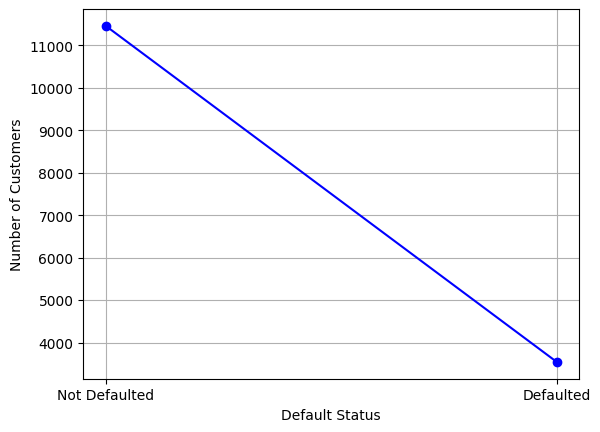

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("loan_default.csv.xlsx")

count = df["Default_Status"].value_counts()

plt.plot(count.index, count.values, marker="o", linestyle="-", color="blue")

plt.xlabel("Default Status")
plt.ylabel("Number of Customers")
plt.xticks([0, 1], ["Not Defaulted", "Defaulted"])

plt.grid(True)
plt.show()


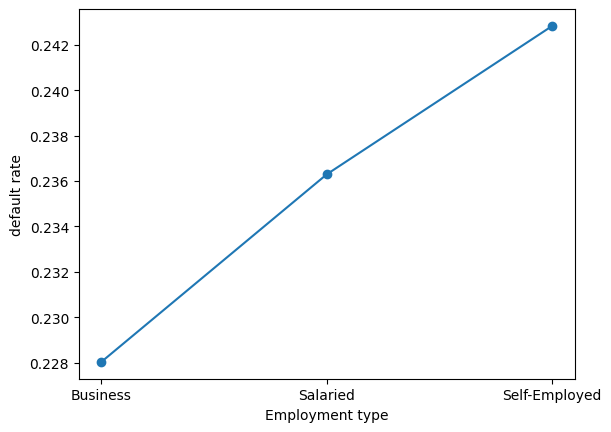

In [ ]:
import pandas as pd
df=pd.read_excel("loan_default.csv.xlsx")
grouped=df.groupby("Employment_Type")
emp_type=grouped.agg(no_of_clients=("Employment_Type","count"),defaulted_customers=("Default_Status","sum"))
emp_type["default%"]=emp_type["defaulted_customers"]/emp_type["no_of_clients"]


import matplotlib.pyplot as plt
plt.plot(emp_type.index,emp_type["default%"],marker="o")
plt.xlabel("Employment type")
plt.ylabel("default rate")
plt.show()

/tmp/ipython-input-1930928554.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cVd=df.groupby("credit_score_range").agg(Total_cust=("Client_ID","count"),Defaulted_cust=("Default_Status","sum"))


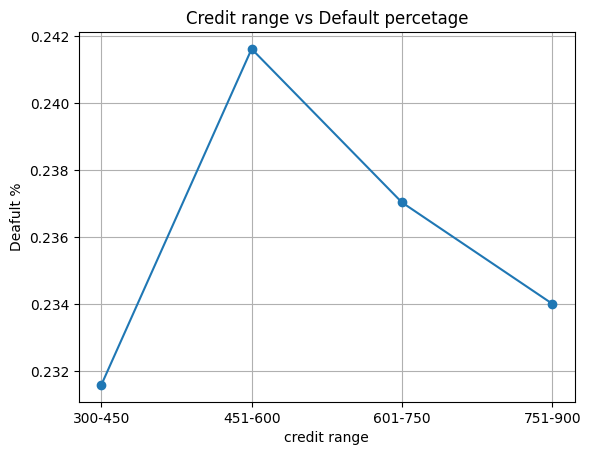

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_excel("loan_default.csv.xlsx")
df["credit_score_range"]=pd.cut(df["Credit_Score"],bins=[300,450,600,750,900],labels=["300-450","451-600","601-750","751-900"],
                                include_lowest=True)

cVd=df.groupby("credit_score_range").agg(Total_cust=("Client_ID","count"),Defaulted_cust=("Default_Status","sum"))

cVd["default%"]=cVd["Defaulted_cust"]/cVd["Total_cust"]

plt.plot(cVd.index,cVd["default%"],marker="o")
plt.xlabel("credit range")
plt.ylabel("Deafult %")
plt.grid()
plt.title("Credit range vs Default percetage")
plt.show()

